## Lab 2 05.02.2019

Deadline 05.02 (send via e-mail), 
-1 point per each day of delay, 
0 since 12.02

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.xkcd()
import networkx as nx
%matplotlib inline

/home/lsherstyuk/anaconda3/envs/cnn/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


### Clustering coefficient

During the lecture we have understood, that the clustering coefficient of a random graph is equal to the probability $p$: $$\text{Clustering coefficient} = \frac{\langle k \rangle}{n} = p $$

In this task you have to check it on generated data.
Please, generate $100$ Random Graphs with $n = 1000$ and $p = 0.002$ (for saving computational time) and plot the box-plot of your computations.

{'whiskers': [<matplotlib.lines.Line2D at 0x7f97221e7550>,
 'caps': [<matplotlib.lines.Line2D at 0x7f97221e7be0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f97221e7390>],
 'medians': [<matplotlib.lines.Line2D at 0x7f972222b2b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f972222b5f8>],
 'means': []}

/home/lsherstyuk/anaconda3/envs/cnn/lib/python3.6/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


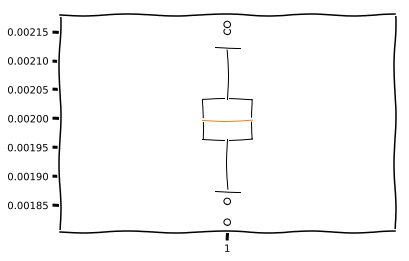

In [13]:
sim_num=100
n=1000
p=0.002


#Readable
# coeffs = []
# for i in range(sim_num):
#     G = nx.fast_gnp_random_graph(n=n,p=p)
#     coeffs.append(sum(G.degree().values())/(n**2))

#beautiful
coeffs = [sum(nx.fast_gnp_random_graph(n=n,p=p).degree().values())/(n**2) for i in range(sim_num)]
plt.boxplot(coeffs)


### Size of small components

In this task you are asked to calculate the average size of small components (small component = not a giant one) with regard to average degree of the network. To see the effect clearly, plot average size around $\langle k \rangle = 1$.

In [3]:
from tqdm import tqdm_notebook

In [70]:
# mean_nonggc_size = lambda G: np.mean(sorted([len(x) for x in nx.connected_components(G)])[:-1])
mean_nonggc_size = lambda G: np.mean([len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)][1:])

def mean_nonggc_size(G):
    l = [len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]
    if len(l)>1:
        return np.mean(l[1:])
    else:
        return 0




sim_num=100
n=500
ps=[-4,-2]



data1=[]
for p_ in tqdm_notebook(np.logspace(start=ps[0],stop=ps[1], num=50)):
    rand = np.random.normal(scale=0.001, size=500)
    for i in tqdm_notebook(range(500),leave=False):
        p=p_+rand[i]
        G = nx.fast_gnp_random_graph(n=n,p=p)
        size = mean_nonggc_size(G)
        k = sum(G.degree().values())/n
        data1.append([p,size,k])
        



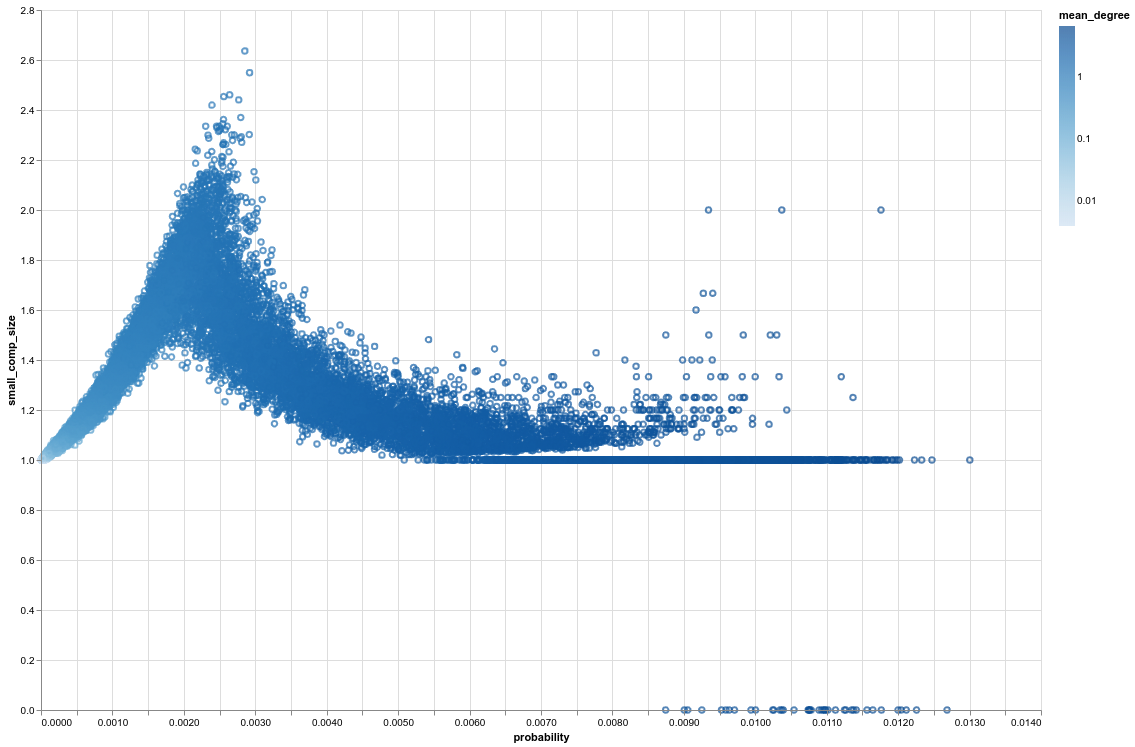

In [74]:
import pandas as pd
alt.data_transformers.disable_max_rows()

import altair as alt
data_df = pd.DataFrame(data1,columns=['probability','small_comp_size','mean_degree'])

alt.Chart(data_df[data_df['mean_degree']>0]).mark_point().encode(
    x='probability',
    y='small_comp_size',
    color=alt.Color('mean_degree', scale=alt.Scale(type='log', base=10))
).properties(
    width=1000,
    height=700
)


### Average path length and transitivity

Plot the average path length and transitivity coefficents with $n=1000$ and p=0.001 while increasing by 0.003 

In [12]:
n=1000
ps=[0.001,0.003]


data3 =[]
for p in tqdm_notebook(np.linspace(*ps, num=100)):
    G = nx.fast_gnp_random_graph(n=n,p=p)
    trans = nx.transitivity([x for x in sorted(nx.connected_component_subgraphs(G), key=len, reverse=True)][0])
    aspl = nx.average_shortest_path_length([x for x in sorted(nx.connected_component_subgraphs(G), key=len, reverse=True)][0])
    data3.append([p,trans,aspl])






AttributeError: module 'bokeh' has no attribute 'plot'

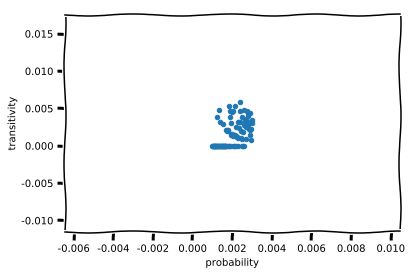

In [15]:
import pandas as pd
df3 = pd.DataFrame(data3, columns=['probability','transitivity','ASPL'])
df3.plot(x='probability', y='transitivity', kind='scatter')
import bokeh

bokeh.

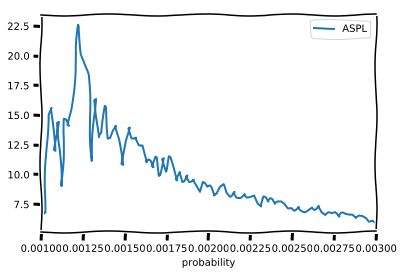

In [8]:
df3.plot(x='probability', y='ASPL')
